This Notebook has some notes that i made  while implementing this 

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


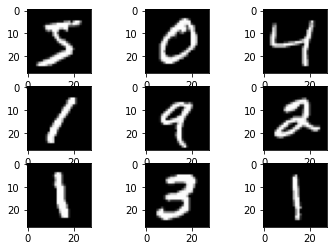

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Reshaping trainX and trainY N and applying one hot encoding

In [ ]:
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1].

In [ ]:

def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a. The following is te docstring of class Dense from the keras documentation:

Computes the crossentropy loss between the labels and predictions.

Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per featur

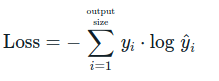

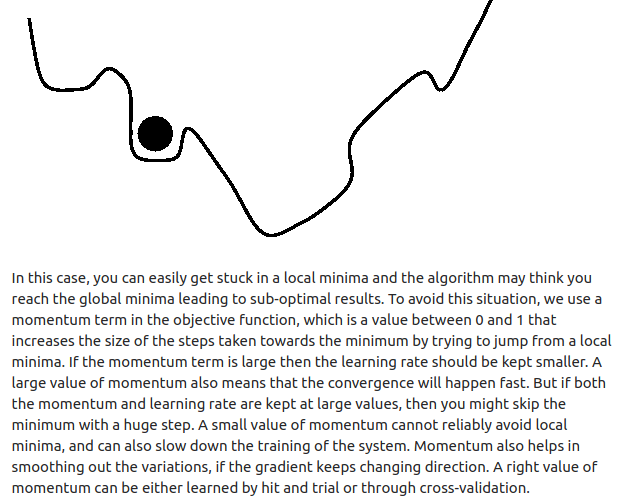

In [ ]:

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))#softmax is used to give probabilities of classes
	opt = SGD(lr=0.01, momentum=0.9)#lr is learning rate 
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

## ***EVALUATION OF MODEL***

To evaluate the model while still building and tuning the model, we create a third subset of the data known as the validation set. A typical train/test/validation split would be to use 60% of the data for training, 20% of the data for validation, and 20% of the data for testing.

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    #batch size ->amount of data to be fed at a time , all 32 batches completion ->1 epoch  , batches division for faster training 
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

# **Printing Results**

In [ ]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data.

In [ ]:
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	pyplot.boxplot(scores)
	pyplot.show()

# **DRIVER FUNCTION**

In [ ]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

> 98.608
> 98.533
> 98.550
> 98.800
> 98.725


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


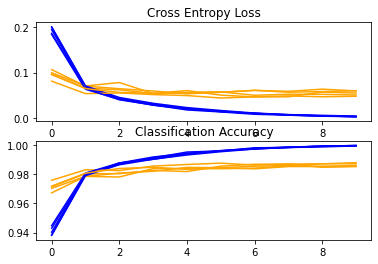

Accuracy: mean=98.643 std=0.103, n=5


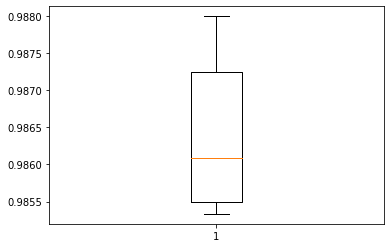

In [ ]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
scores, histories = evaluate_model(trainX, trainY)
summarize_diagnostics(histories)
summarize_performance(scores)
 #n=5 since k-fold ->5 

In [ ]:
trainX, trainY, testX, testY = load_dataset()
model=define_model()
trainX, testX = prep_pixels(trainX, testX)
model.fit(trainX,trainY,epochs=10, batch_size=32)
model.save('final_model.h5')


Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1604 - accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0529 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0334 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0150 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0108 - accuracy: 0.9972
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0073 - accuracy: 0.9982
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 10/10
1875/1875 [==============================] - 33s 18m

In [ ]:
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

> 98.910


# **TESTING FOR VALUES MANUALLY**

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename,color_mode = "grayscale", target_size=(28, 28))
	pyplot.imshow(img) 
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

3


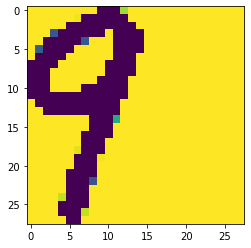

In [ ]:

img = load_image('7.png')
digit = model.predict_classes(img)
print(digit[0])

In [ ]:
from PIL import Image
img = Image.open('n.png').convert('LA')
img.save('7.png')